In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
bouldering = pd.read_csv('data/boulder-route-finder.csv')
sport = pd.read_csv('data/sport-route-finder.csv')
toprope = pd.read_csv('data/toprope-route-finder.csv')
trad = pd.read_csv('data/trad-route-finder.csv')

In [8]:
bouldering.head()

,Route,Location,URL,Avg Stars,Your Stars,Route Type,Rating,Pitches,Length,Area Latitude,Area Longitude
0,Slanty Crack,Corner Area > Loch Lomond > Idaho Springs > Co...,https://www.mountainproject.com/route/10605105...,1.0,-1,"Boulder, Alpine",V-easy,1,35.0,39.8328,-105.6771
1,2 Steps,Corner Area > Loch Lomond > Idaho Springs > Co...,https://www.mountainproject.com/route/10605104...,1.0,-1,"Boulder, Alpine",V0-,1,35.0,39.8328,-105.6771
2,Highlords Traverse,Hump Area > Loch Lomond > Idaho Springs > Colo...,https://www.mountainproject.com/route/10605107...,3.0,-1,"Boulder, Alpine",V1,1,NaN,39.8328,-105.6771
3,Marmot Traverse,Hump Area > Loch Lomond > Idaho Springs > Colo...,https://www.mountainproject.com/route/10605108...,2.0,-1,"Boulder, Alpine",V1,1,NaN,39.8328,-105.6771
4,Over the Hump,Hump Area > Loch Lomond > Idaho Springs > Colo...,https://www.mountainproject.com/route/10605107...,2.0,-1,"Boulder, Alpine",V1+,1,15.0,39.8328,-105.6771


In [15]:
b_location_lists = []
b_state = []
for route in range(len(bouldering['Location'])):
    loc = bouldering['Location'][route].split(' > ')
    b_state.append(loc[-1])
    b_location_lists.append(loc)

bouldering['Location_Lists'] = b_location_lists
bouldering['State'] = b_state

In [35]:
location_class = bouldering.drop(['Location', 'URL', 'Your Stars', 'Route Type', 'Area Latitude', 'Area Longitude'], axis=1)

In [39]:
location_class.head()

,Route,Avg Stars,Rating,Pitches,Length,Location_Lists,State
0,White Rastafarian,3.9,V2 R,1,20.0,"[White Rastafarian Boulder, Outback Bouldering...",California
1,High Plains Drifter,3.9,V7,1,35.0,"[Drifter/Smoking Boulder, Buttermilks Main, Bu...",California
2,Bachar Cracker,3.9,V4,1,NaN,"[Bachar Cracker Boulder, Camp 4 Boulders, * Yo...",California
3,Golden Shower,4.0,V5,1,15.0,"[Asphalt Boulders, Rocktown, Georgia]",Georgia
4,Seven Spanish Angels (aka The Ruckus),3.9,V6,1,14.0,"[Get Carter Boulder, Buttermilk Country, Bisho...",California


In [82]:
num_routes = []
avg_length = []
avg_stars = []

for state in bouldering['State'].unique():
    num_routes.append(len(bouldering[bouldering['State'] == state]))
    avg_length.append(np.mean(bouldering[bouldering['State'] == state]['Length']))
    avg_stars.append(np.mean(bouldering[bouldering['State'] == state]['Avg Stars']))

In [67]:
summary_state_data = pd.DataFrame({'num_routes': num_routes, 'avg_length': avg_length, 'avg_stars': avg_stars}, index=bouldering['State'].unique())

In [68]:
summary_state_data.head()

,num_routes,avg_length,avg_stars
California,273,16.636364,3.195604
Georgia,32,13.277778,3.362500
Texas,38,18.947368,3.400000
Colorado,126,15.190476,3.146032
Wisconsin,44,13.588235,3.325000


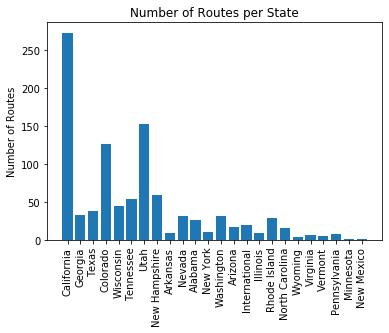

In [77]:
# Number of Climbing Routes Per State

plt.bar(summary_state_data.index, summary_state_data['num_routes'])
plt.title('Number of Routes per State')
plt.xticks(rotation='90')
plt.ylabel('Number of Routes');

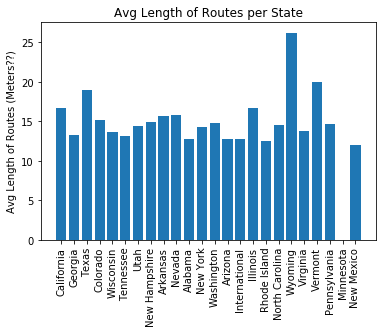

In [79]:
# Avg Length of Route Per State

plt.bar(summary_state_data.index, summary_state_data['avg_length'])
plt.title('Avg Length of Routes per State')
plt.xticks(rotation='90')
plt.ylabel('Avg Length of Routes (Meters??)');

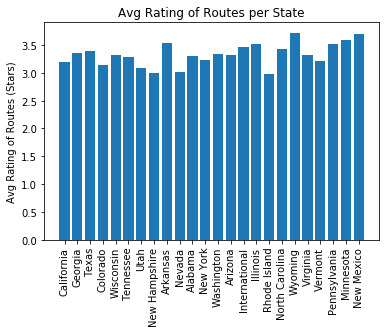

In [81]:
# Avg Rating of Route Per State

plt.bar(summary_state_data.index, summary_state_data['avg_stars'])
plt.title('Avg Rating of Routes per State')
plt.xticks(rotation='90')
plt.ylabel('Avg Rating of Routes (Stars)');